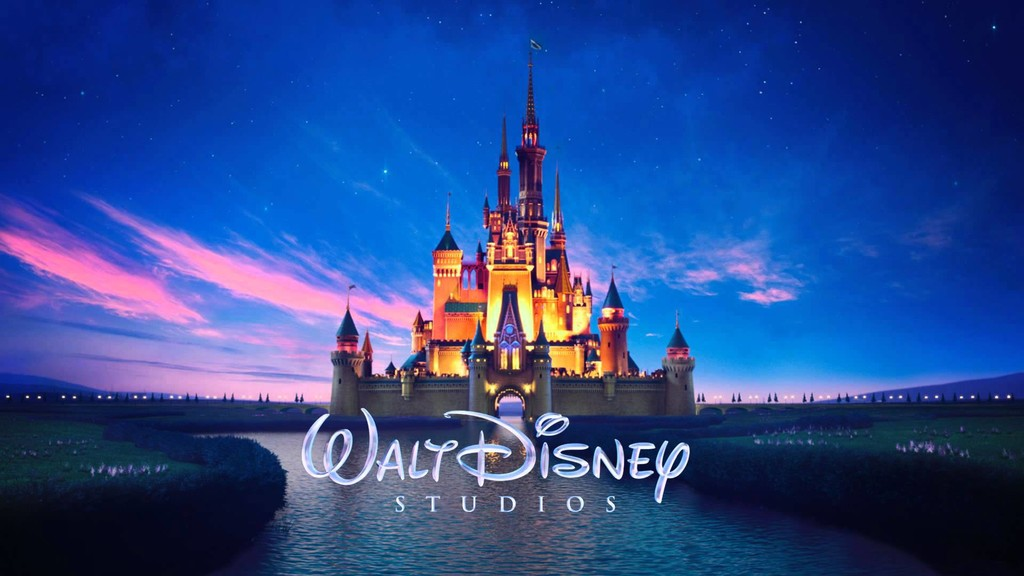

# INTRODUCCI√ìN

Este cuaderno est√° dise√±ado para realizar un An√°lisis Exploratorio de Datos (EDA) y generar insights narrativos sobre el conjunto de datos de ingresos brutos de pel√≠culas de Disney.
Exploraremos las tendencias clave en el rendimiento de las pel√≠culas de Disney, analizando c√≥mo factores como el g√©nero y la calificaci√≥n influyen en su √©xito en taquilla. Adem√°s, se identificar√°n patrones relevantes que podr√≠an ayudar a comprender mejor la relaci√≥n entre las caracter√≠sticas de las pel√≠culas y su desempe√±o financiero.

**Descripci√≥n de la variable**

*   movie_title: Titulo de la pel√≠cula
*   release_date: Fecha de estreno de la pel√≠cula
*   genre: g√©nero de la pel√≠cula
*   mpaa_rating: Clasificaci√≥n de la pel√≠cula seg√∫n el sistema de clasificaci√≥n de pel√≠culas de la Motion Picture Association
*   total_gross: Total bruto de la pel√≠cula
*   inflation_adjusted_gross: Se refiere al total bruto de la pel√≠cula despu√©s de la inflaci√≥n, por lo que las pel√≠culas antiguas tienen un valor mayor

**Exportaciones**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import re

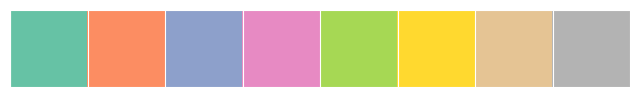

In [28]:
color_pallet = sns.color_palette(palette='Set2')
sns.palplot(color_pallet)
plt.show()

**EDA**

In [10]:
df = pd.read_csv('/content/disney_movies_total_gross.csv')

In [11]:
df

movie_title release_date      genre mpaa_rating  \
0    Snow White and the Seven Dwarfs   1937-12-21    Musical           G   
1                          Pinocchio   1940-02-09  Adventure           G   
2                           Fantasia   1940-11-13    Musical           G   
3                  Song of the South   1946-11-12  Adventure           G   
4                         Cinderella   1950-02-15      Drama           G   
..                               ...          ...        ...         ...   
574         The Light Between Oceans   2016-09-02      Drama       PG-13   
575                   Queen of Katwe   2016-09-23      Drama          PG   
576                   Doctor Strange   2016-11-04  Adventure       PG-13   
577                            Moana   2016-11-23  Adventure          PG   
578     Rogue One: A Star Wars Story   2016-12-16  Adventure       PG-13   

     total_gross  inflation_adjusted_gross  
0      184925485                5228953251  
1       84300000                2188229052  
2       83320000                2187090808  
3       65000000                1078510579  
4       85000000                 920608730  
..           ...                       ...  
574     12545979                  12545979  
575      8874389                   8874389  
576    232532923                 232532923  
577    246082029                 246082029  
578    529483936                 529483936  

[579 rows x 6 columns]

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   movie_title               579 non-null    object
 1   release_date              579 non-null    object
 2   genre                     562 non-null    object
 3   mpaa_rating               523 non-null    object
 4   total_gross               579 non-null    int64 
 5   inflation_adjusted_gross  579 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 27.3+ KB


El conjunto de datos contiene algunos valores nulos en g√©nero y mpaa_rating que voy a completar como 'NaN'

In [13]:
df = df.fillna("NaN")

**Temporal Analysis**

Convertimos la variable release_date a datetime

In [14]:
df['release_date'] = pd.to_datetime(df['release_date'])

Usando release_date, crearemos otra variable, d√©cada, que muestra c√≥mo cambiaron las tendencias de las pel√≠culas de Disney a lo largo de las d√©cadas.

In [15]:
lis=[]
for i in range(579):
    if df['release_date'][i].year > 2010:
        lis.append('2010-2020')
    elif df['release_date'][i].year <= 2010 and df['release_date'][i].year > 2000:
        lis.append('2000-2010')
    elif df['release_date'][i].year <= 2000 and df['release_date'][i].year > 1990:
        lis.append('1990-2000')
    elif df['release_date'][i].year <= 1990 and df['release_date'][i].year > 1980:
        lis.append('1980-1990')
    elif df['release_date'][i].year <= 1980 and df['release_date'][i].year > 1970:
        lis.append('1970-1980')
    elif df['release_date'][i].year <= 1970 and df['release_date'][i].year > 1960:
        lis.append('1960-1970')
    elif df['release_date'][i].year <= 1960 and df['release_date'][i].year > 1950:
        lis.append('1950-1960')
    else:
        lis.append('<1950')
df['decade'] = lis

In [16]:
df

movie_title release_date      genre mpaa_rating  \
0    Snow White and the Seven Dwarfs   1937-12-21    Musical           G   
1                          Pinocchio   1940-02-09  Adventure           G   
2                           Fantasia   1940-11-13    Musical           G   
3                  Song of the South   1946-11-12  Adventure           G   
4                         Cinderella   1950-02-15      Drama           G   
..                               ...          ...        ...         ...   
574         The Light Between Oceans   2016-09-02      Drama       PG-13   
575                   Queen of Katwe   2016-09-23      Drama          PG   
576                   Doctor Strange   2016-11-04  Adventure       PG-13   
577                            Moana   2016-11-23  Adventure          PG   
578     Rogue One: A Star Wars Story   2016-12-16  Adventure       PG-13   

     total_gross  inflation_adjusted_gross     decade  
0      184925485                5228953251      <1950  
1       84300000                2188229052      <1950  
2       83320000                2187090808      <1950  
3       65000000                1078510579      <1950  
4       85000000                 920608730      <1950  
..           ...                       ...        ...  
574     12545979                  12545979  2010-2020  
575      8874389                   8874389  2010-2020  
576    232532923                 232532923  2010-2020  
577    246082029                 246082029  2010-2020  
578    529483936                 529483936  2010-2020  

[579 rows x 7 columns]



> Nota: Cada pel√≠cula estrenada antes de 1950 est√° en una categor√≠a y la categor√≠a 2010-2020 solo contiene pel√≠culas estrenadas hasta 2016



**Visualizaci√≥n de tendencias utilizando la variable release_date**

In [18]:
fig = px.scatter(df, x='release_date', y="total_gross",template='plotly_dark',title='¬øQu√© g√©nero ha recaudado m√°s a lo largo de los a√±os?',color='genre')
fig.data[0].line.color = 'limegreen'
fig.show()



> **Observaciones**

üìå La primera pel√≠cula producida por Disney fue un musical, el cl√°sico 'Blancanieves y los siete enanitos'.

üìå La frecuencia de las pel√≠culas aumenta considerablemente a lo largo de las d√©cadas.

üìå Los ingresos brutos de las pel√≠culas muestran un crecimiento exponencial, alcanzando sus picos m√°s altos despu√©s del 2000.

üìå La popularidad de los g√©neros cambi√≥ con el tiempo: musicales dominaron antes de 1960, mientras que aventura y acci√≥n lideran desde 1990.

üìå Desde 1990, se observa una mayor diversidad de g√©neros, en contraste con las d√©cadas anteriores, que estaban dominadas por unos pocos g√©neros.

üìå Las producciones de alto presupuesto despu√©s del 2000 han generado los mayores ingresos brutos, destacando el impacto de franquicias y √©xitos recientes.

üìå La variable de la d√©cada permite un an√°lisis m√°s profundo sobre c√≥mo cambiaron las tendencias de g√©neros y recaudaci√≥n a lo largo del tiempo.

In [19]:
fig = px.scatter(df, x='release_date', y="inflation_adjusted_gross",template='plotly_dark',title='¬øQu√© g√©nero recaud√≥ m√°s despu√©s de la inflaci√≥n a lo largo de los a√±os?',color='genre')
fig.data[0].line.color = 'limegreen'
fig.show()



> **Observaciones**

üìå Con el ajuste por inflaci√≥n, los ingresos de las pel√≠culas cl√°sicas se incrementaron notablemente, posicionando a 'Blancanieves y los siete enanitos' como la producci√≥n m√°s valiosa de Disney en t√©rminos de recaudaci√≥n, superando incluso a Avengers: Endgame.

üìå Las pel√≠culas anteriores a 1960, como los musicales, dominan los ingresos ajustados por inflaci√≥n, destac√°ndose por ser cl√°sicos duraderos.

üìå Desde 1990, los g√©neros de acci√≥n y aventura comenzaron a liderar los ingresos brutos ajustados por inflaci√≥n, mostrando un cambio en las preferencias del p√∫blico.

üìå Aunque el n√∫mero de pel√≠culas producidas creci√≥ con los a√±os, los ingresos ajustados por inflaci√≥n de las pel√≠culas m√°s recientes son m√°s consistentes pero no alcanzan los niveles de cl√°sicos como Blancanieves.

üìå Los g√©neros musicales y de aventuras generaron los picos m√°s altos en ingresos ajustados, destac√°ndose en diferentes per√≠odos de tiempo.

üìå En las d√©cadas recientes, aunque se observa mayor diversidad de g√©neros, ninguno logra los niveles de ingresos ajustados alcanzados por los grandes cl√°sicos de Disney.

üìå Este an√°lisis resalta c√≥mo las pel√≠culas hist√≥ricas siguen siendo econ√≥micamente relevantes debido al ajuste por inflaci√≥n, subrayando el impacto de producciones de la √©poca dorada de Disney.



In [20]:
fig = px.scatter(df, x='release_date', y="total_gross",template='plotly_dark',title='¬øQu√© pel√≠cula clasificada por la MPAA recaud√≥ m√°s a lo largo de los a√±os?',color='mpaa_rating')
fig.data[0].line.color = 'limegreen'
fig.show()

In [21]:
fig = px.scatter(df, x='release_date', y="inflation_adjusted_gross",template='plotly_dark',title='¬øQu√© pel√≠cula clasificada por la MPAA recaud√≥ m√°s despu√©s de la inflaci√≥n a lo largo de los a√±os?',color='mpaa_rating')
fig.data[0].line.color = 'limegreen'
fig.show()



> **Observaciones**

üìåPodemos ver tendencias similares en la clasificaci√≥n de la MPAA: las primeras pel√≠culas de Disney sol√≠an tener clasificaci√≥n G, pero las m√°s recientes tienen en su mayor√≠a clasificaci√≥n PG y PG-13.

üìåDebido a la inflaci√≥n en los ingresos brutos de las pel√≠culas, las primeras pel√≠culas que ten√≠an clasificaci√≥n G recaudaron m√°s que las pel√≠culas actuales con clasificaci√≥n PG o PG-13.



Utilizamos la variable D√©cada para realizar un an√°lisis de tendencias m√°s detallado.

<ipython-input-31-25309a9b3174>:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-31-25309a9b3174>:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-31-25309a9b3174>:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-31-25309a9b3174>:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-31-25309a9b3174>:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and wi

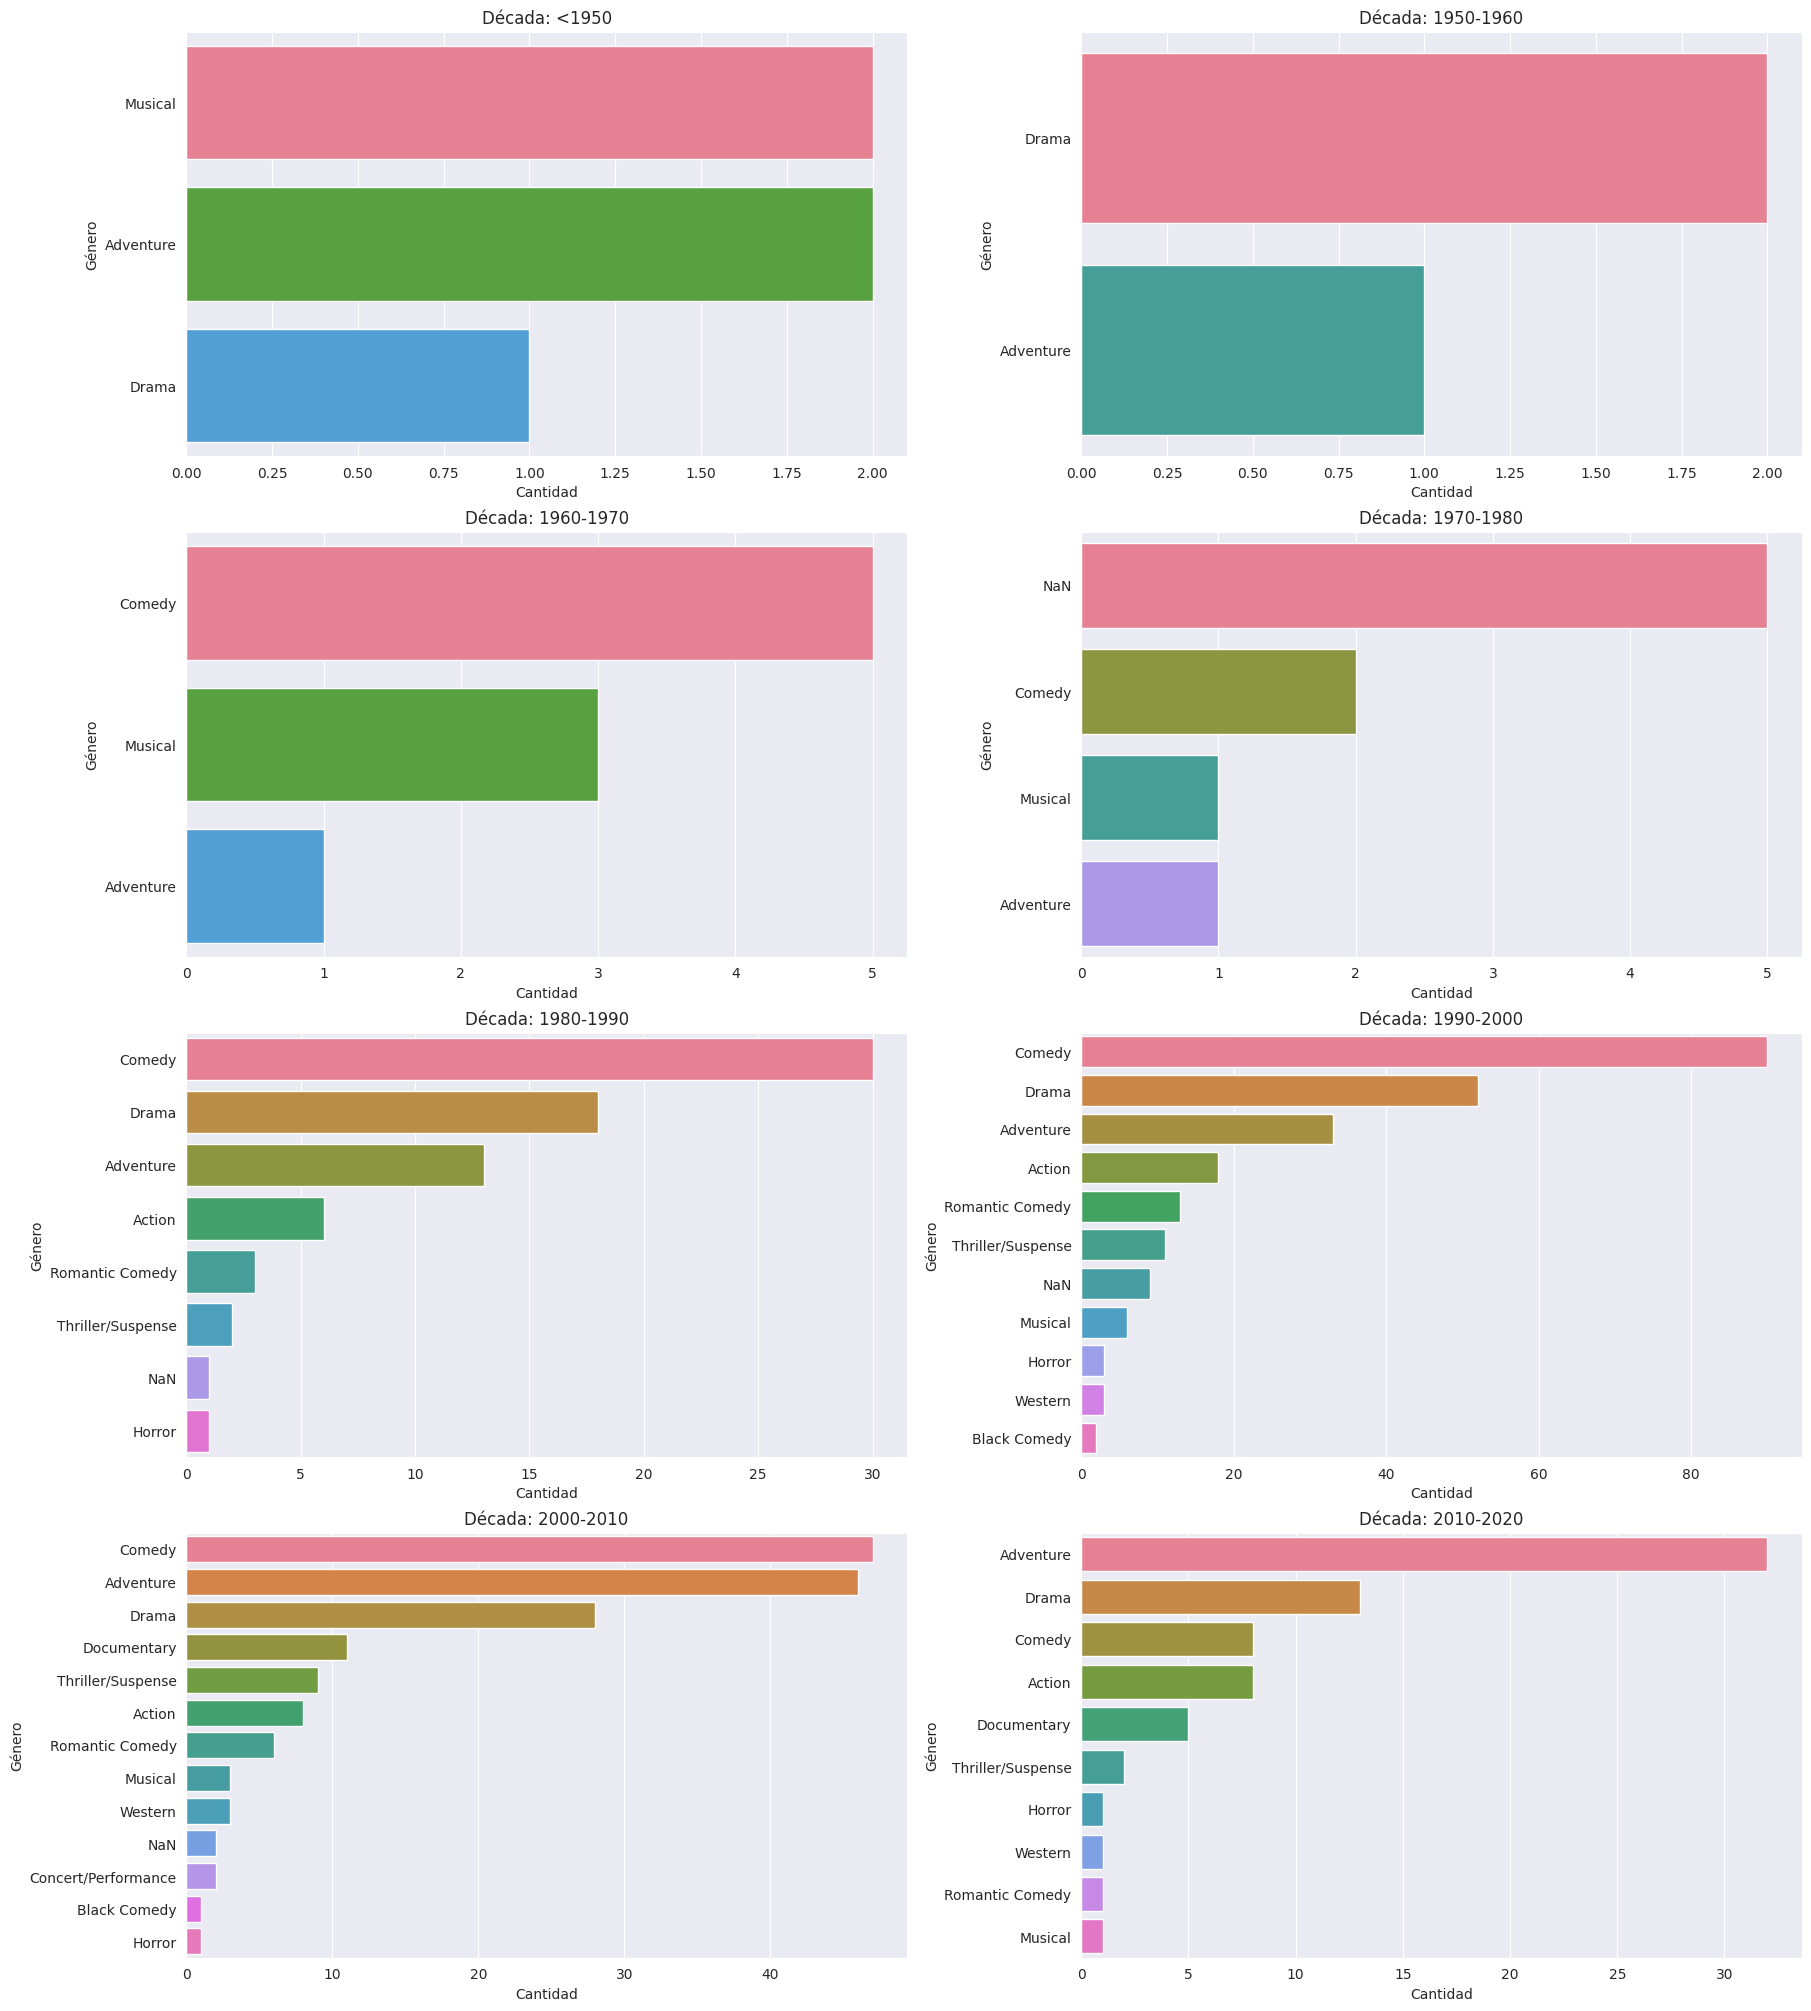

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

decade_lis = df['decade'].unique()
sns.set_style('darkgrid')
rows = -(-len(decade_lis) // 2)
fig, axes = plt.subplots(rows, 2, figsize=(18, rows * 5), constrained_layout=True)
axes = axes.flatten() if rows > 1 else [axes]
for i, decade in enumerate(decade_lis):
    ax = axes[i]
    palette = sns.color_palette("husl", len(df[df['decade'] == decade]['genre'].unique()))
    sns.countplot(
        y='genre',
        data=df[df['decade'] == decade],
        ax=ax,
        order=df[df['decade'] == decade]['genre'].value_counts().index,
        palette=palette
    ).set(title=f'D√©cada: {decade}', xlabel='Cantidad', ylabel='G√©nero')
for ax in axes[len(decade_lis):]:
    ax.remove()
plt.show()



> Observaciones

üìåPodemos ver que en diferentes d√©cadas Disney se centr√≥ en hacer pel√≠culas de diferentes g√©neros.

üìåDe 1980 a 2010 se centraron principalmente en pel√≠culas de comedia, aunque las pel√≠culas de aventuras tuvieron un rendimiento mucho mejor a partir de 2010, observaron este punto y comenzaron a centrarse m√°s en el g√©nero de aventuras.



Usamos movie_title para clasificar pel√≠culas seg√∫n su franquicia

In [32]:
movies_francise_list = []
lis = df['movie_title']
for i in lis:
    a = re.search(r'Cars|Star Wars|Pirate|Prince of|Avengers|Captain America|Thor|Doctor Strange|Muppets|Toy Story|Ant Man|Guardian|Iron Man',i)
    if a:
        movies_francise_list.append(i)
movies_name=['Cars','Star Wars','Pirates of the Caribbean','Prince of Persia','Toy Story','Muppets']
marvel = ['Avengers','Captain America','Thor','Doctor Strange','Iron Man','Guardians']
df['movie_francise'] = 'None'

In [33]:
def movies_francise(movies_name_list,replace_with_name_in_list=True,name=''):
    for i in movies_francise_list:
        for k in range(len(df)):
            if df['movie_title'][k] ==i:
                for j in movies_name_list:
                    a= re.search(j,i)
                    if a:
                        if replace_with_name_in_list:
                            df['movie_francise'][k] = j
                        else:
                            df['movie_francise'][k] = name
movies_francise(movies_name)
movies_francise(marvel,False,'Marvel')
df_movie_francise = df[df['movie_francise'] != 'None']

<ipython-input-33-de733d6363f3>:9: FutureWarning:

ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


<ipython-input-33-de733d6363f3>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documenta

In [34]:
df

movie_title release_date      genre mpaa_rating  \
0    Snow White and the Seven Dwarfs   1937-12-21    Musical           G   
1                          Pinocchio   1940-02-09  Adventure           G   
2                           Fantasia   1940-11-13    Musical           G   
3                  Song of the South   1946-11-12  Adventure           G   
4                         Cinderella   1950-02-15      Drama           G   
..                               ...          ...        ...         ...   
574         The Light Between Oceans   2016-09-02      Drama       PG-13   
575                   Queen of Katwe   2016-09-23      Drama          PG   
576                   Doctor Strange   2016-11-04  Adventure       PG-13   
577                            Moana   2016-11-23  Adventure          PG   
578     Rogue One: A Star Wars Story   2016-12-16  Adventure       PG-13   

     total_gross  inflation_adjusted_gross     decade movie_francise  
0      184925485                5228953251      <1950           None  
1       84300000                2188229052      <1950           None  
2       83320000                2187090808      <1950           None  
3       65000000                1078510579      <1950           None  
4       85000000                 920608730      <1950           None  
..           ...                       ...        ...            ...  
574     12545979                  12545979  2010-2020           None  
575      8874389                   8874389  2010-2020           None  
576    232532923                 232532923  2010-2020         Marvel  
577    246082029                 246082029  2010-2020           None  
578    529483936                 529483936  2010-2020      Star Wars  

[579 rows x 8 columns]



>

Nota: Por el momento, solo he considerado las siguientes franquicias de pel√≠culas:

*  Toy Story
*  Piratas del Caribe
*  Cars
*  Pr√≠ncipe de Persia
*  Marvel
*  Star Wars

Esta lista no es exhaustiva de todas las franquicias de Disney. En futuras versiones, podr√≠a incluir m√°s franquicias, pero para el momento actual, mi an√°lisis se basa √∫nicamente en estas.



**XXXXXX**

In [35]:
fig = px.scatter(df_movie_francise, x='release_date', y="total_gross",template='plotly_dark',title='Pel√≠culas Franquicia Performance en los a√±os',color='movie_francise')
fig.data[0].line.color = 'limegreen'
fig.show()

In [36]:
fig = px.scatter(df_movie_francise, x='release_date', y="inflation_adjusted_gross",template='plotly_dark',title='Rendimiento de las pel√≠culas de Franquicia despu√©s de la inflaci√≥n a lo largo de los a√±os',color='movie_francise')
fig.data[0].line.color = 'limegreen'
fig.show()



>

üìåUna de las pel√≠culas de Star Wars (Star Wars: El despertar de la fuerza) recaud√≥ m√°s al menos hasta 2016

üìåToy Story y Piratas del Caribe tuvieron un desempe√±o ligeramente mejor despu√©s de la inflaci√≥n
El conjunto de datos solo contiene pel√≠culas que originalmente fueron producidas por Disney, por lo que se excluyen todas las pel√≠culas que Disney compr√≥ m√°s tarde; por ejemplo: solo se incluyen las pel√≠culas de Star Wars realizadas despu√©s de 2012


Ahora veamos si las pel√≠culas que tienen una franquicia tuvieron mejor desempe√±o que las pel√≠culas que no tienen franquicia.

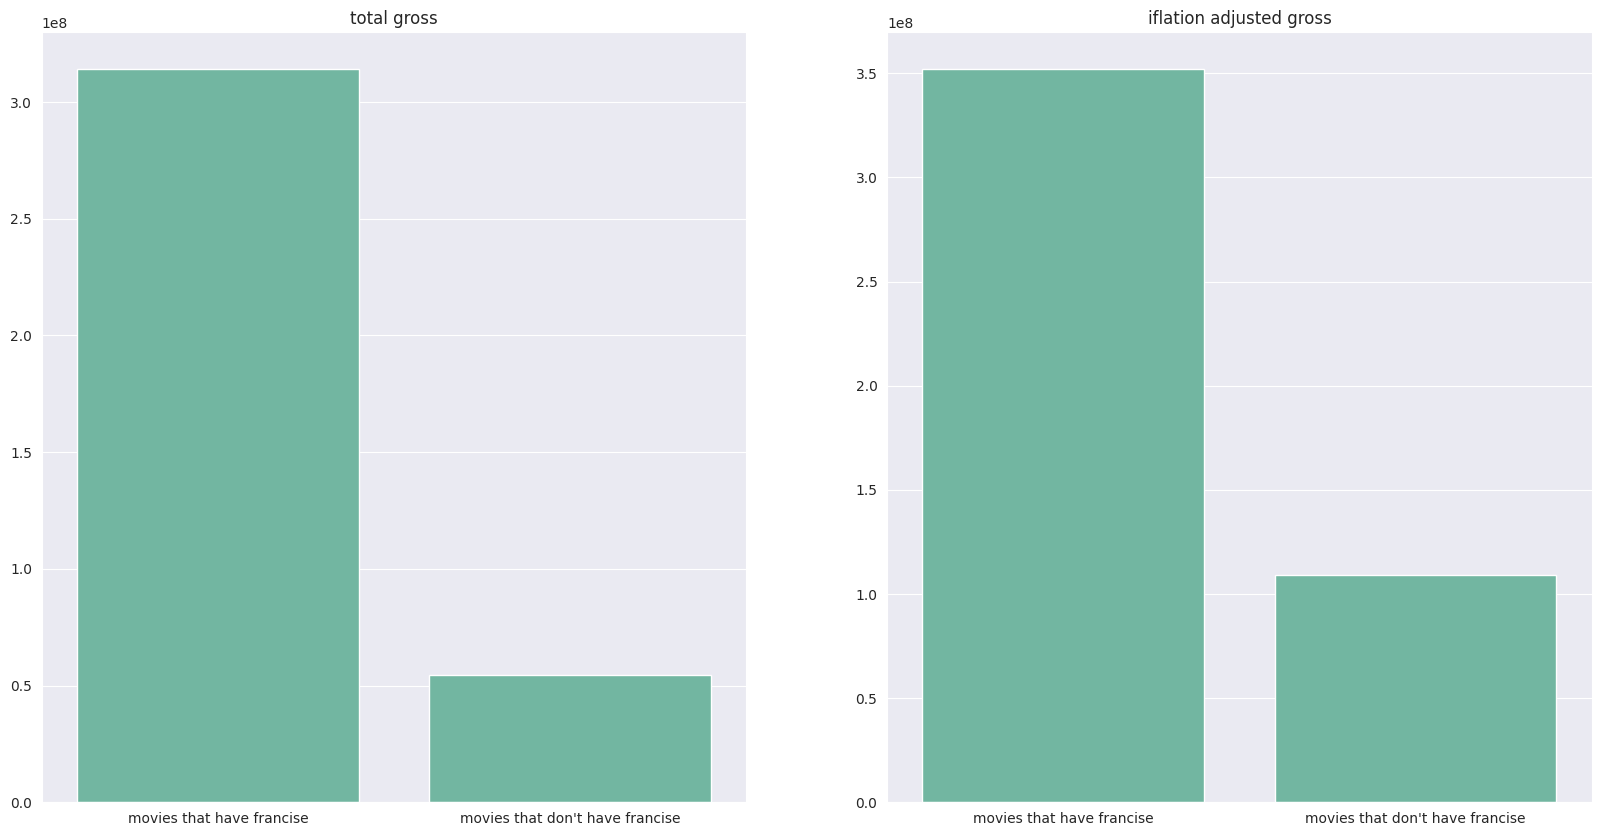

In [37]:
fig, ax= plt.subplots(1,2,figsize=(20,10))
y=[]
y.append(np.sum(df[df['movie_francise'] !='None']['total_gross'])/len(df[df['movie_francise'] !='None']['total_gross']))
y.append(np.sum(df[df['movie_francise'] =='None']['total_gross'])/len(df[df['movie_francise'] =='None']['total_gross']))
x=["movies that have francise","movies that don't have francise"]
fig1 = sns.barplot(x=x,y=y,ax=ax[0])
fig1.set_title('total gross')
y=[]
y.append(np.sum(df[df['movie_francise'] !='None']['inflation_adjusted_gross'])/len(df[df['movie_francise'] !='None']['inflation_adjusted_gross']))
y.append(np.sum(df[df['movie_francise'] =='None']['inflation_adjusted_gross'])/len(df[df['movie_francise'] =='None']['inflation_adjusted_gross']))
x=["movies that have francise","movies that don't have francise"]
fig2 = sns.barplot(x=x,y=y,ax=ax[1])
fig2.set_title('iflation adjusted gross')
plt.show()



> üìå Las pel√≠culas de franquicias generan significativamente m√°s ingresos, incluso ajustados por inflaci√≥n, consolid√°ndose como el principal motor financiero de Disney.



<ipython-input-39-8377af5cd4f7>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




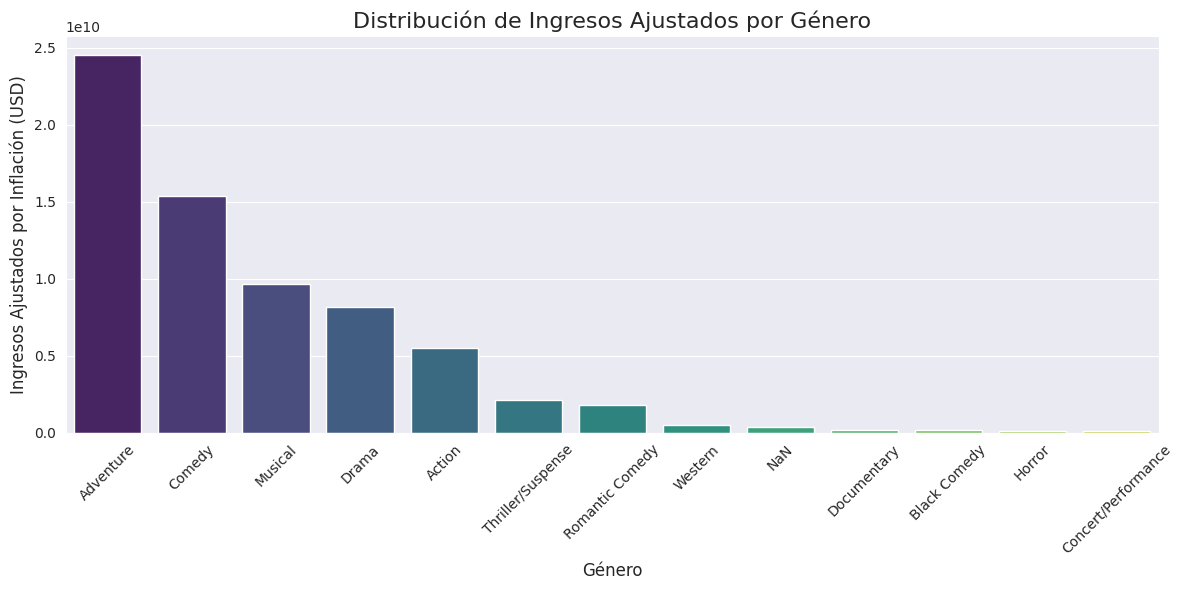

In [39]:
genre_gross = df.groupby('genre')['inflation_adjusted_gross'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_gross.index, y=genre_gross.values, palette='viridis')
plt.title('Distribuci√≥n de Ingresos Ajustados por G√©nero', fontsize=16)
plt.xlabel('G√©nero', fontsize=12)
plt.ylabel('Ingresos Ajustados por Inflaci√≥n (USD)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



>

üìå Aventura lidera ampliamente: El g√©nero de aventura es el que m√°s ingresos ha generado ajustados por inflaci√≥n, mostrando su gran popularidad a lo largo del tiempo.

üìå Comedia en segundo lugar: La comedia ocupa el segundo puesto, destacando su atractivo continuo para audiencias de todas las edades.

üìå Musicales y dramas destacados en el pasado: Estos g√©neros tienen una buena recaudaci√≥n, probablemente impulsada por cl√°sicos de Disney.

üìå G√©neros como thriller y acci√≥n muestran potencial: Aunque no lideran, tienen un aporte significativo en ingresos.



<ipython-input-40-a37c7827e5b2>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




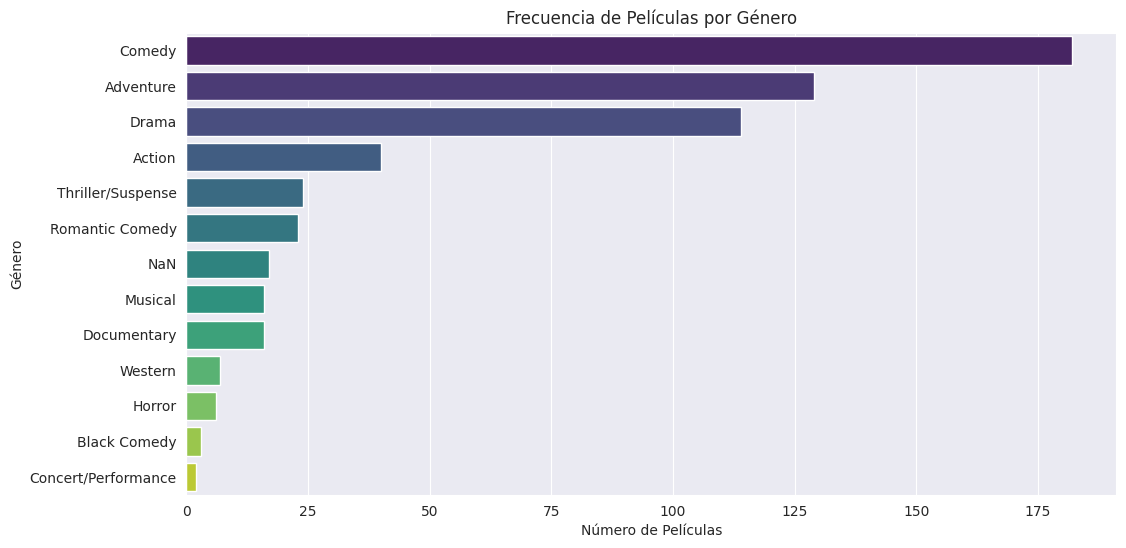

In [40]:
plt.figure(figsize=(12, 6))
sns.countplot(y='genre', data=df, order=df['genre'].value_counts().index, palette='viridis')
plt.title('Frecuencia de Pel√≠culas por G√©nero')
plt.xlabel('N√∫mero de Pel√≠culas')
plt.ylabel('G√©nero')
plt.show()


üìå Observaciones de la gr√°fica:

Comedia lidera en frecuencia: El g√©nero "Comedy" es el m√°s producido, superando a otros g√©neros con m√°s de 175 pel√≠culas.

Aventura y Drama: Los g√©neros "Adventure" y "Drama" tambi√©n tienen una producci√≥n significativa, ocupando el segundo y tercer lugar.

G√©neros poco frecuentes: G√©neros como "Concert/Performance" y "Black Comedy" tienen una producci√≥n casi insignificante en comparaci√≥n con los dem√°s.

Incremento de g√©neros modernos: G√©neros como "Action" y "Thriller/Suspense" reflejan una tendencia moderna en la industria.

Presencia de valores faltantes: Hay un n√∫mero considerable de pel√≠culas con g√©neros no especificados (NaN).

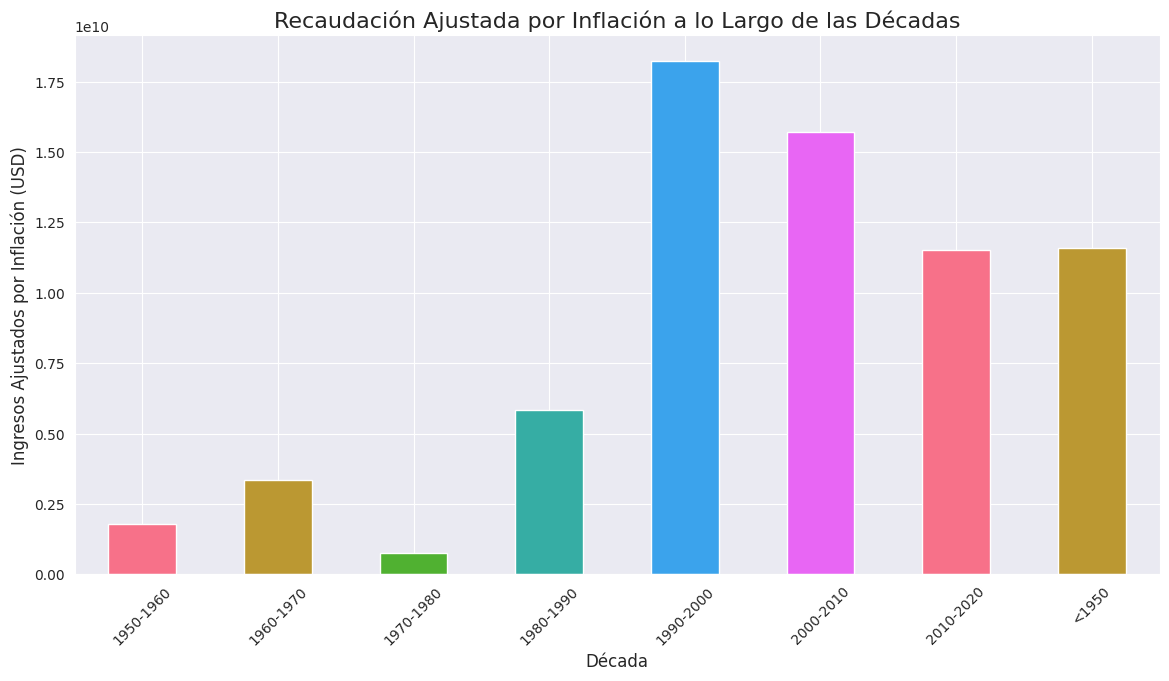

In [41]:
sns.set_palette("husl")
sns.set_style("darkgrid")
plt.figure(figsize=(14, 7))
df.groupby('decade')['inflation_adjusted_gross'].sum().sort_index().plot(kind='bar', color=sns.color_palette("husl"))
plt.title("Recaudaci√≥n Ajustada por Inflaci√≥n a lo Largo de las D√©cadas", fontsize=16)
plt.xlabel("D√©cada", fontsize=12)
plt.ylabel("Ingresos Ajustados por Inflaci√≥n (USD)", fontsize=12)
plt.xticks(rotation=45)
plt.show()

üìå Observaciones de la gr√°fica:

Incremento significativo a partir de los a√±os 1990-2000: La recaudaci√≥n ajustada por inflaci√≥n muestra un aumento significativo a partir de esta d√©cada, destac√°ndose como la m√°s lucrativa.

El impacto de las d√©cadas m√°s recientes: Aunque 2000-2010 mantiene un alto nivel de ingresos, las d√©cadas 2010-2020 y <1950 tambi√©n muestran resultados s√≥lidos.

Auge de pel√≠culas cl√°sicas: La d√©cada anterior a 1950 sigue teniendo una fuerte presencia gracias a las pel√≠culas cl√°sicas, cuyo valor se amplific√≥ al ajustarse por inflaci√≥n.

Fluctuaciones en las d√©cadas de 1960-1980: Las d√©cadas de 1960 a 1980 presentan ingresos m√°s modestos en comparaci√≥n con las dem√°s.

Dominio de producciones modernas: A partir de 1990, los ingresos reflejan la transici√≥n de Disney hacia producciones de mayor presupuesto y franquicias.

<ipython-input-42-f669ccf0c511>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




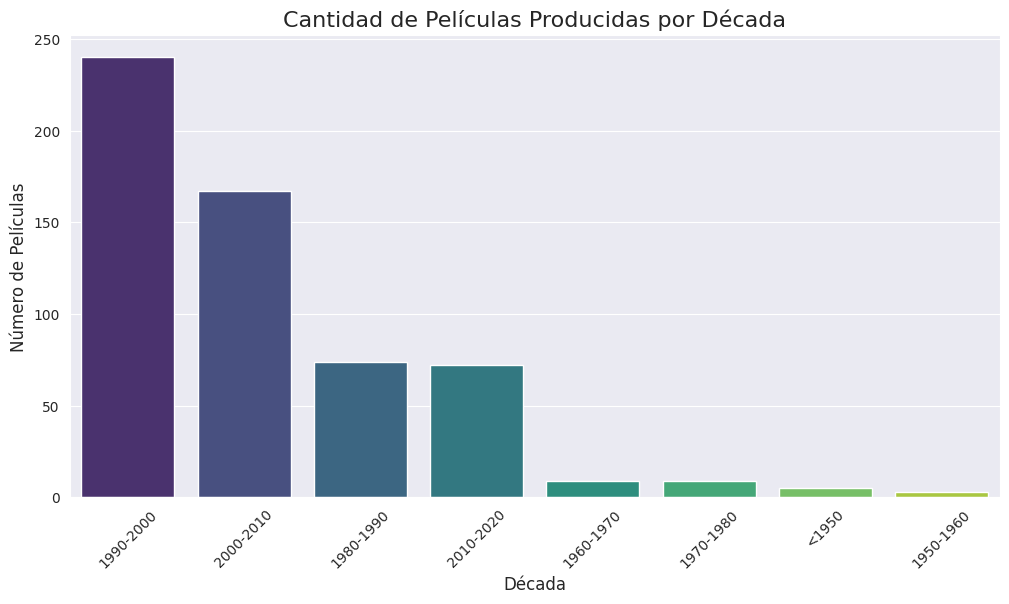

In [42]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='decade', palette='viridis', order=df['decade'].value_counts().index)
plt.title('Cantidad de Pel√≠culas Producidas por D√©cada', fontsize=16)
plt.xlabel('D√©cada', fontsize=12)
plt.ylabel('N√∫mero de Pel√≠culas', fontsize=12)
plt.xticks(rotation=45)
plt.show()

**üìå Observaciones sobre la gr√°fica de cantidad de pel√≠culas producidas por d√©cada:**

üìå La d√©cada de 1990-2000 destaca como la m√°s prol√≠fica en t√©rminos de producci√≥n, con m√°s de 200 pel√≠culas lanzadas.

üìå La d√©cada de 2000-2010 tambi√©n muestra una alta actividad, ocupando el segundo lugar en cantidad de pel√≠culas producidas.

üìå Entre 1980 y 1990, la producci√≥n de pel√≠culas experiment√≥ un notable aumento comparado con d√©cadas anteriores.

üìå D√©cadas m√°s tempranas como 1950-1960 y <1950 muestran un n√∫mero significativamente menor de pel√≠culas, reflejando un inicio modesto en la industria.

üìå A partir de 1980, se observa un crecimiento constante en la cantidad de pel√≠culas producidas por Disney.

üìå Las d√©cadas de 1960-1970 y 1970-1980 tienen n√∫meros bajos de producci√≥n, probablemente por cambios en la estrategia de mercado.

<ipython-input-47-997df5ed636d>:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-47-997df5ed636d>:26: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



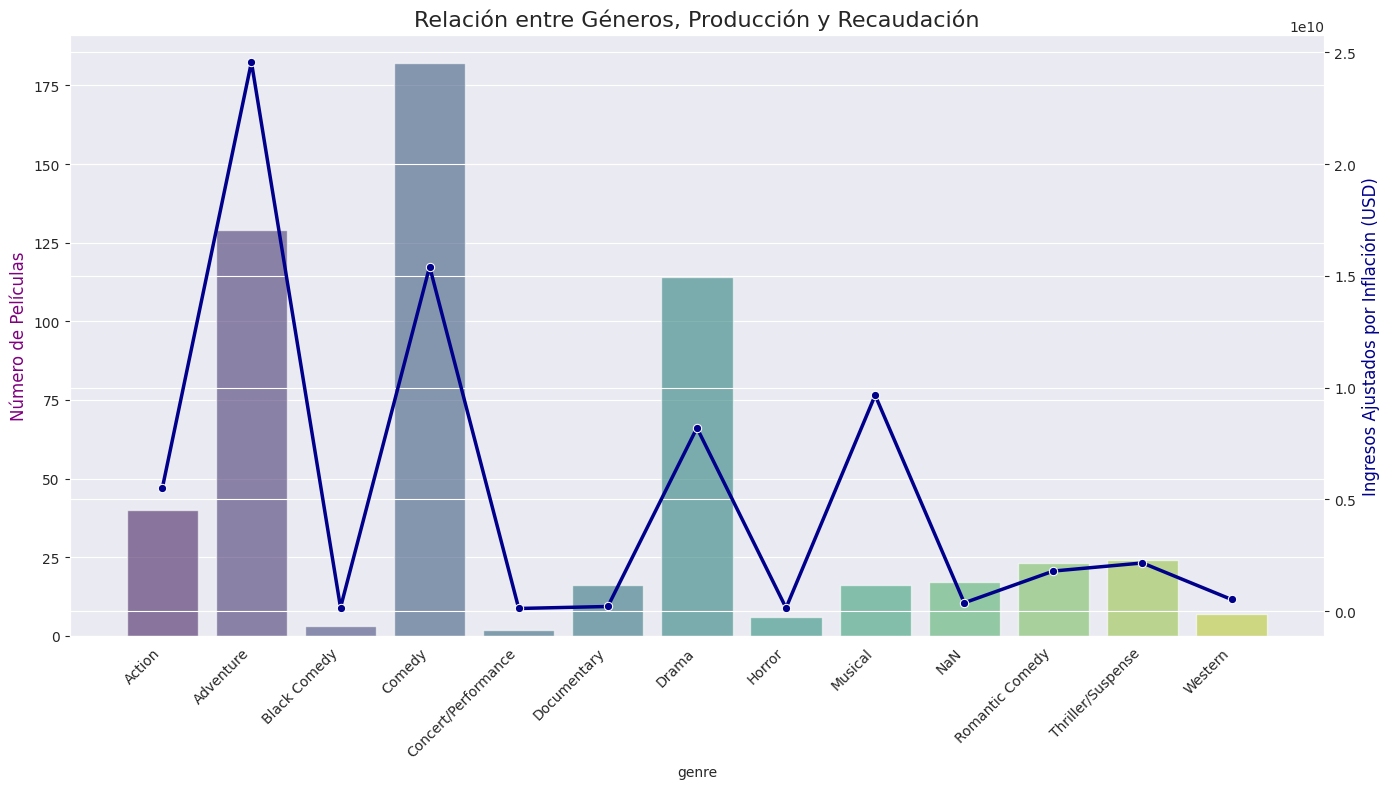

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
genre_data = df.groupby('genre').agg({
    'inflation_adjusted_gross': 'sum',
    'movie_title': 'count'
}).reset_index()
genre_data = genre_data.rename(columns={'inflation_adjusted_gross': 'Total Ingresos Ajustados', 'movie_title': 'N√∫mero de Pel√≠culas'})
fig, ax1 = plt.subplots(figsize=(14, 8))
sns.barplot(
    x='genre',
    y='N√∫mero de Pel√≠culas',
    data=genre_data,
    palette='viridis',
    alpha=0.6,
    ax=ax1
)
ax1.set_ylabel('N√∫mero de Pel√≠culas', fontsize=12, color='purple')
ax1.set_title('Relaci√≥n entre G√©neros, Producci√≥n y Recaudaci√≥n', fontsize=16)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
ax2 = ax1.twinx()
sns.lineplot(
    x='genre',
    y='Total Ingresos Ajustados',
    data=genre_data,
    sort=False,
    marker='o',
    color='darkblue',
    linewidth=2.5,
    ax=ax2
)
ax2.set_ylabel('Ingresos Ajustados por Inflaci√≥n (USD)', fontsize=12, color='darkblue')
plt.tight_layout()
plt.show()

üìå Comedia es el g√©nero con mayor frecuencia de pel√≠culas producidas, pero no lidera en ingresos ajustados por inflaci√≥n.

üìå Aventura sobresale como el g√©nero con los mayores ingresos ajustados, destac√°ndose a pesar de no ser el m√°s producido.

üìå G√©neros como Black Comedy y Concert/Performance tienen una producci√≥n baja y generan ingresos m√≠nimos.

üìå Drama tiene una producci√≥n alta, pero sus ingresos no alcanzan los niveles de g√©neros como Aventura y Acci√≥n.

üìå G√©neros como Acci√≥n y Thriller/Suspense muestran una proporci√≥n m√°s equilibrada entre frecuencia y recaudaci√≥n.

Mean Squared Error (MSE): 9.315705763659373e+16
R¬≤ Score: 0.5153152875991626


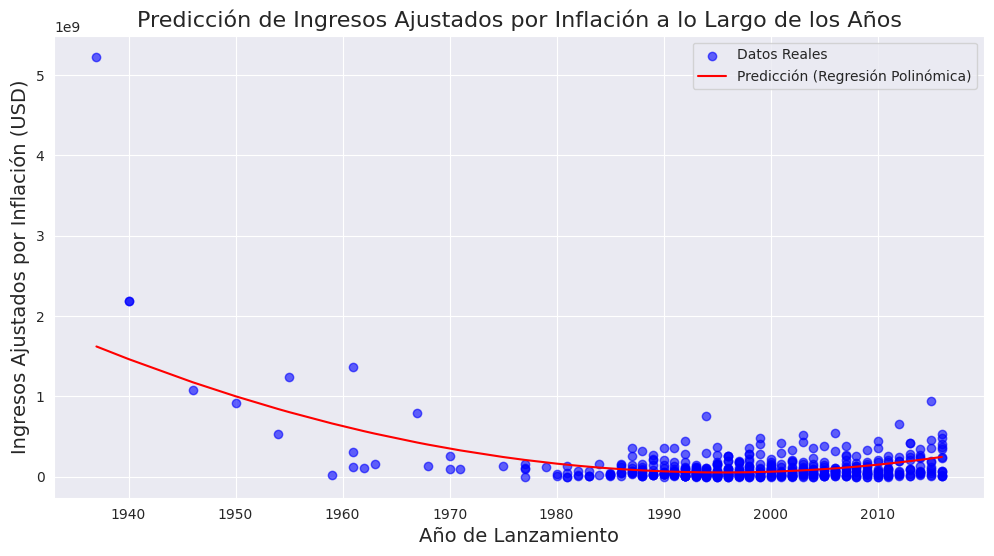

In [49]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
df_filtered = df.dropna(subset=['inflation_adjusted_gross', 'release_date'])
df_filtered['year'] = df_filtered['release_date'].dt.year
X = df_filtered[['year']].values
y = df_filtered['inflation_adjusted_gross'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
model = LinearRegression()
model.fit(X_train_poly, y_train)
y_pred = model.predict(X_test_poly)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")
print(f"R¬≤ Score: {r2}")
plt.figure(figsize=(12, 6))
plt.scatter(X, y, color='blue', alpha=0.6, label="Datos Reales")
plt.plot(np.sort(X, axis=0), model.predict(poly.transform(np.sort(X, axis=0))), color='red', label="Predicci√≥n (Regresi√≥n Polin√≥mica)")
plt.title("Predicci√≥n de Ingresos Ajustados por Inflaci√≥n a lo Largo de los A√±os", fontsize=16)
plt.xlabel("A√±o de Lanzamiento", fontsize=14)
plt.ylabel("Ingresos Ajustados por Inflaci√≥n (USD)", fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

**Observaciones üìå**

üìâ Tendencia decreciente en los ingresos ajustados por inflaci√≥n:

Los ingresos ajustados por inflaci√≥n tienden a disminuir para las pel√≠culas m√°s antiguas a medida que avanzan las d√©cadas, especialmente antes de 1980.

üìà Incremento en la dispersi√≥n desde 1990:

A partir de los a√±os 1990, aunque el modelo predice ingresos m√°s bajos en promedio, hay una mayor variaci√≥n, con algunas pel√≠culas obteniendo ingresos significativamente altos.

üîç Relaci√≥n no lineal capturada:

El modelo de regresi√≥n polin√≥mica captura una relaci√≥n no lineal que explica c√≥mo las pel√≠culas m√°s recientes se desv√≠an del patr√≥n decreciente.

üé• Impacto de pel√≠culas antiguas ic√≥nicas:

Las pel√≠culas de antes de 1950, como "Snow White", destacan con ingresos excepcionalmente altos incluso despu√©s de ajustar por inflaci√≥n, elevando la curva inicial.

üìä Limitaci√≥n del modelo:

Aunque el modelo captura bien la tendencia general, la dispersi√≥n en los datos recientes sugiere que factores adicionales como g√©nero, presencia de franquicias y estrategias de marketing influyen significativamente en los ingresos.

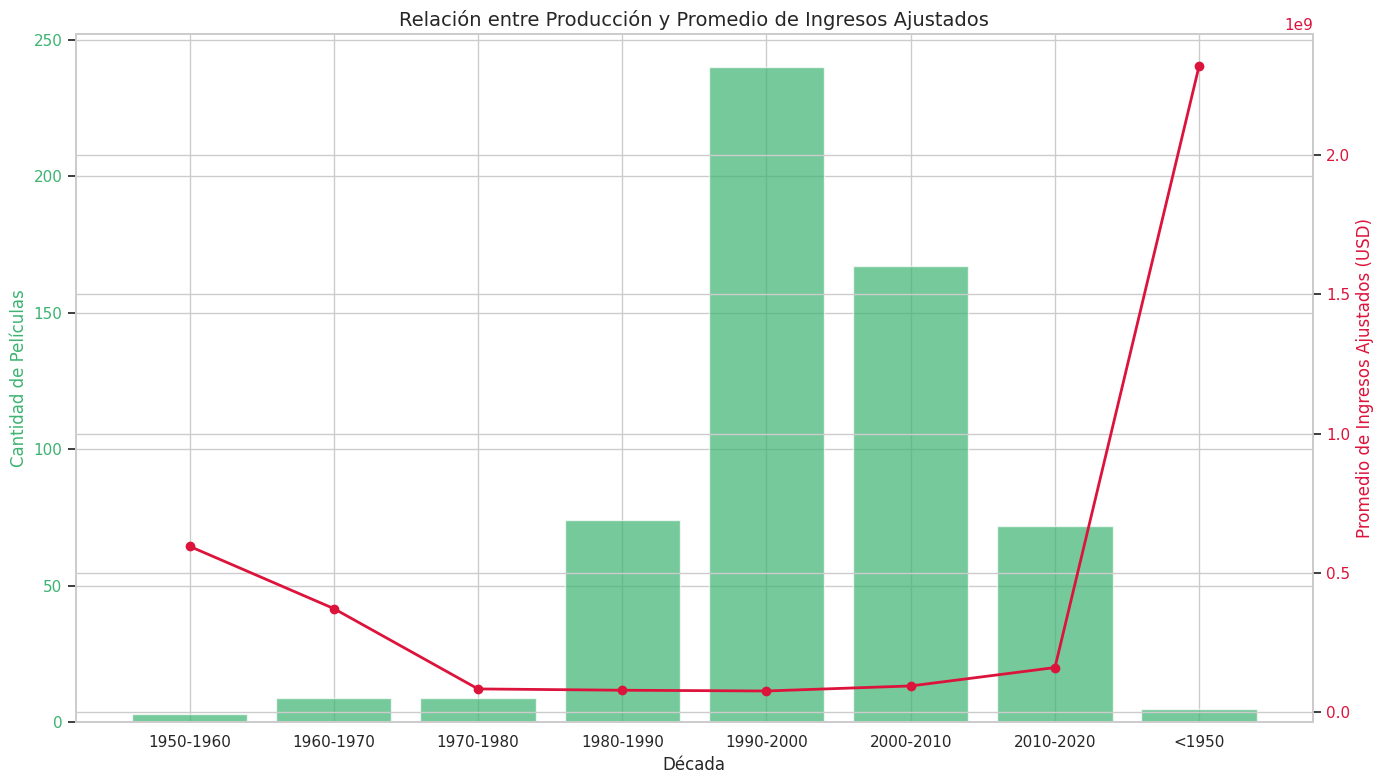

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Datos necesarios
decade_summary = df.groupby('decade').agg(
    {'movie_title': 'count', 'inflation_adjusted_gross': 'mean'}
).rename(columns={'movie_title': 'movie_count', 'inflation_adjusted_gross': 'avg_gross'}).reset_index()

# Configuraci√≥n de estilo
sns.set(style="whitegrid")
fig, ax1 = plt.subplots(figsize=(14, 8))

# Gr√°fico de barras: cantidad de pel√≠culas
color_bar = 'mediumseagreen'
ax1.bar(decade_summary['decade'], decade_summary['movie_count'], color=color_bar, alpha=0.7)
ax1.set_ylabel('Cantidad de Pel√≠culas', fontsize=12, color=color_bar)
ax1.set_xlabel('D√©cada', fontsize=12)
ax1.tick_params(axis='y', labelcolor=color_bar)
ax1.set_title('Relaci√≥n entre Producci√≥n y Promedio de Ingresos Ajustados', fontsize=14)

# Eje secundario: promedio de ingresos ajustados
ax2 = ax1.twinx()
color_line = 'crimson'
ax2.plot(decade_summary['decade'], decade_summary['avg_gross'], color=color_line, marker='o', linewidth=2)
ax2.set_ylabel('Promedio de Ingresos Ajustados (USD)', fontsize=12, color=color_line)
ax2.tick_params(axis='y', labelcolor=color_line)

# Mejorar el dise√±o
plt.xticks(rotation=45)
fig.tight_layout()
plt.show()


Conclusiones Generales del An√°lisis:

üìå Incremento en la cantidad de pel√≠culas producidas en d√©cadas recientes: Se observa que a partir de 1990 la cantidad de pel√≠culas lanzadas por Disney creci√≥ significativamente, reflejando una estrategia m√°s agresiva en producci√≥n cinematogr√°fica.

üìå Diversificaci√≥n de g√©neros a lo largo del tiempo: Las primeras d√©cadas estuvieron dominadas por musicales y dramas, mientras que en las √∫ltimas d√©cadas g√©neros como acci√≥n y aventura han ganado popularidad, generando mayores ingresos.

üìå Ingresos ajustados por inflaci√≥n destacan las pel√≠culas cl√°sicas: Pel√≠culas ic√≥nicas como Blancanieves y los Siete Enanitos tienen ingresos ajustados sobresalientes, superando a pel√≠culas modernas en t√©rminos relativos.

üìå Franquicias generan ingresos significativamente m√°s altos: Las pel√≠culas asociadas a franquicias como Marvel y Star Wars muestran una clara ventaja tanto en ingresos brutos como ajustados por inflaci√≥n en comparaci√≥n con pel√≠culas independientes.

üìå Promedio de ingresos altos en d√©cadas tempranas: Aunque se produc√≠an pocas pel√≠culas en d√©cadas como 1950-1960, estas lograban un promedio de ingresos ajustados por inflaci√≥n mucho mayor, probablemente debido al impacto cultural y la falta de competencia.

üìå Tendencia decreciente en ingresos ajustados promedio: En d√©cadas recientes, aunque la cantidad de pel√≠culas ha aumentado, el promedio de ingresos ajustados por pel√≠cula ha disminuido, lo que sugiere una saturaci√≥n del mercado.

üìå √âxitos contempor√°neos dominan en n√∫meros absolutos: A pesar del impacto hist√≥rico de pel√≠culas cl√°sicas, √©xitos modernos como los de Avengers y Frozen han dominado en ingresos absolutos, impulsados por estrategias de marketing global y lanzamientos simult√°neos.

Estas conclusiones reflejan c√≥mo Disney ha evolucionado estrat√©gicamente en t√©rminos de producci√≥n, diversificaci√≥n de g√©neros y capitalizaci√≥n de franquicias, adapt√°ndose a un mercado cinematogr√°fico en constante cambio.